In [17]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv("movie.csv", encoding="ISO-8859-1")
spam = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [4]:
movies.shape

(4916, 28)

In [5]:
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [6]:
type(movies["movie_title"])

pandas.core.series.Series

In [7]:
movies["has_seen"] = 0
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,has_seen
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,0
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,0
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16,0
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,0


In [8]:
movies["director_actor_facebook_likes"] = movies["director_facebook_likes"] + movies["actor_1_facebook_likes"]+ movies["actor_2_facebook_likes"] + movies["actor_3_facebook_likes"]
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,has_seen,director_actor_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,2791.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,46563.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0,11554.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,95000.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,0,1427.0
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,0,NaN
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16,0,0.0
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,0,2154.0


In [14]:
movies["director_actor_facebook_likes"].isna().count().max()

np.int64(4916)

In [10]:
movies.fillna(0, inplace=True)
movies["director_actor_facebook_likes"] = movies["director_facebook_likes"] + movies["actor_1_facebook_likes"]+ movies["actor_2_facebook_likes"] + movies["actor_3_facebook_likes"]
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,has_seen,director_actor_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,2791.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,46563.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0,11554.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,95000.0
4,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,0.0,Documentary,...,0,0,0.0,0.0,12.0,7.1,0.00,0,0,274.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,0.0,Comedy|Drama,...,Canada,0,0.0,2013.0,470.0,7.7,0.00,84,0,1427.0
4912,Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,0.0,Crime|Drama|Mystery|Thriller,...,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000,0,1753.0
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,0.0,Drama|Horror|Thriller,...,USA,0,1400.0,2013.0,0.0,6.3,0.00,16,0,0.0
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660,0,2154.0


Median Budget: 15000000.0
Mean Budget: 32949238.8270952
Min Budget: 0.0
Max Budget: 4200000000.0
59.28


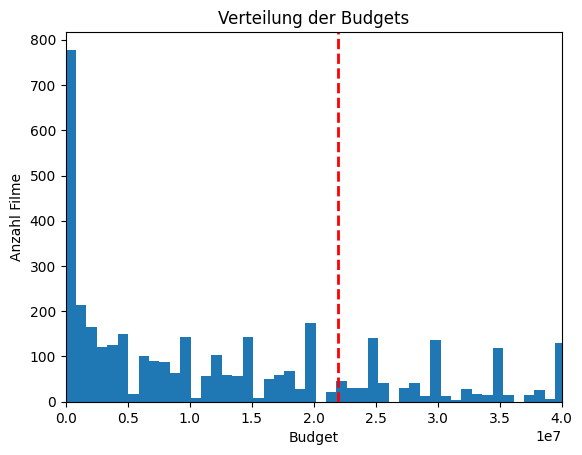

In [33]:
# 0.6 Es stellt sich die Frage, ob ein Film, dessen Produktion (vgl. Budget) 22 Millionen beträgt, kostspielig ist oder nicht. Wie könnte man das herausfinden?

budget = movies["budget"]

budget_median = budget.median()
budget_mean = budget.mean()
budget_min = budget.min()
budget_max = budget.max()

print(f"Median Budget: {budget_median}")
print(f"Mean Budget: {budget_mean}")
print(f"Min Budget: {budget_min}")
print(f"Max Budget: {budget_max}")

percentile_22m = stats.percentileofscore(budget, 22000000)
print(f"{percentile_22m:.2f}")

plt.hist(budget, bins=5000)
plt.axvline(22000000, color='red', linestyle='dashed', linewidth=2)
plt.xlim(0, 40000000)
plt.title('Verteilung der Budgets')
plt.xlabel('Budget')
plt.ylabel('Anzahl Filme')
plt.show()



0.7 Grundlage bildet das SMS-Spam-Dataset2. Dieses weist 5574 Nachrichten auf, die entweder als Spam oder Ham (=kein Spam) Nachricht klassifiziert sind. Laden Sie a) den Datensatz (Plain text). Fügen Sie b) eine weitere Spalte hinzu, die die Gesamtlänge der jeweiligen Nachricht aufweist (siehe nachfolgende Abbildung)



In [35]:
spam.count().max()

np.int64(5572)

In [39]:
spam["length"] = spam["v2"].apply(len)
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,161
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,37
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,57
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,125
